In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
from datetime import timedelta, date
import datetime as dt
from flask import Flask, jsonify


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, inspect, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite", echo = False)

In [6]:
#using concepts from Stu_Dates exercise 10:3:Stu Dates to examine data

In [7]:
inspector = inspect(engine)
inspector.get_table_names()

['measurement', 'station']

In [8]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [9]:
#see what's in the measurement table 
engine.execute('SELECT * FROM measurement LIMIT 10').fetchall()

[(1, 'USC00519397', '2010-01-01', 0.08, 65.0),
 (2, 'USC00519397', '2010-01-02', 0.0, 63.0),
 (3, 'USC00519397', '2010-01-03', 0.0, 74.0),
 (4, 'USC00519397', '2010-01-04', 0.0, 76.0),
 (5, 'USC00519397', '2010-01-06', None, 73.0),
 (6, 'USC00519397', '2010-01-07', 0.06, 70.0),
 (7, 'USC00519397', '2010-01-08', 0.0, 64.0),
 (8, 'USC00519397', '2010-01-09', 0.0, 68.0),
 (9, 'USC00519397', '2010-01-10', 0.0, 73.0),
 (10, 'USC00519397', '2010-01-11', 0.01, 64.0)]

In [10]:
columns = inspector.get_columns('station')
for c in columns:
    print(c['name'], c["type"])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [11]:
#see what's in the station table
engine.execute('SELECT * FROM station LIMIT 10').fetchall()

[(1, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0),
 (2, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6),
 (3, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0),
 (4, 'USC00517948', 'PEARL CITY, HI US', 21.3934, -157.9751, 11.9),
 (5, 'USC00518838', 'UPPER WAHIAWA 874.3, HI US', 21.4992, -158.0111, 306.6),
 (6, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5),
 (7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9),
 (8, 'USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 21.3152, -157.9992, 0.9),
 (9, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)]

In [12]:

# switching to SQLAlchemy

In [13]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [14]:
# We can view all of the classes that automap found (same as )
Base.classes.keys()

['measurement', 'station']

In [15]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [16]:
# Create our session (link) from Python to the DB
session = Session(engine)

In [17]:
#using concepts from Ins_Dates exercise week 10 day 3 excercise #3 to access date data

In [18]:
# Calculate the date 1 year ago from the last data point in the database

session.query(Measurement.date).order_by(Measurement.date.desc()).first()



('2017-08-23')

In [19]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results

year_ago = dt.date(2017, 8, 23) - dt.timedelta(days=365)

In [20]:
# Perform a query to retrieve the data and precipitation scores #?(typo for date? scores?)
 
results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date > year_ago).all()
results

[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

# Exploratory Climate Analysis

In [21]:

# Save the query results as a Pandas DataFrame and set the index to the date column

precipitation_df = pd.DataFrame(results)
precipitation_df.head()






,date,prcp
0,2016-08-24,0.08
1,2016-08-25,0.08
2,2016-08-26,0.00
3,2016-08-27,0.00
4,2016-08-28,0.01


In [22]:
# Sort the dataframe by date

precipitation_df.set_index('date').head()

,prcp
date,
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
2016-08-28,0.01


In [23]:
# Use Pandas to calculate the summary statistics for the precipitation data

precipitation_df.describe()


,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


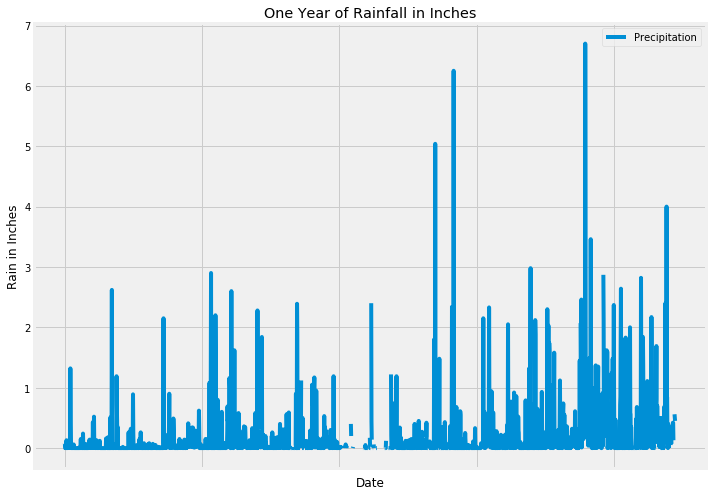

In [24]:
#Use Pandas Plotting with Matplotlib to plot the data
#plot using pandas

precipitation_df.plot('date', 'prcp', figsize = (10,7), use_index = True, legend=False)
plt.xlabel('Date')
plt.ylabel('Rain in Inches')
plt.title('One Year of Rainfall in Inches')
plt.legend(['Precipitation'])
plt.tight_layout()
fig = plt.figure()
plt.show()

In [25]:
#save figure
fig.savefig('plot.png')


In [26]:
# Design a query to show how many stations are available in this dataset?
station_count = session.query(Station.station).count
station_count()

9

In [27]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
activity_levels = session.query(Station.station, Station.name, Measurement.station, func.count(Measurement.tobs)).filter(Station.station == Measurement.station).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
activity_levels

[('USC00519281', 'WAIHEE 837.5, HI US', 'USC00519281', 2772),
 ('USC00519397', 'WAIKIKI 717.2, HI US', 'USC00519397', 2724),
 ('USC00513117', 'KANEOHE 838.1, HI US', 'USC00513117', 2709),
 ('USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 'USC00519523', 2669),
 ('USC00516128', 'MANOA LYON ARBO 785.2, HI US', 'USC00516128', 2612),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  'USC00514830',
  2202),
 ('USC00511918', 'HONOLULU OBSERVATORY 702.2, HI US', 'USC00511918', 1979),
 ('USC00517948', 'PEARL CITY, HI US', 'USC00517948', 1372),
 ('USC00518838', 'UPPER WAHIAWA 874.3, HI US', 'USC00518838', 511)]

In [28]:
most_active = activity_levels[0]
most_active

('USC00519281', 'WAIHEE 837.5, HI US', 'USC00519281', 2772)

In [29]:
# Using the station id from the previous query, calculate the lowest temperature recorded,

In [30]:
m_a_temp = session.query(Measurement.station, Measurement.tobs).\
filter(Measurement.station == most_active[0], Measurement.date > year_ago).\
order_by(Measurement.tobs.desc()).all()





In [31]:
m_a_temp[0]

('USC00519281', 83.0)

In [32]:
# highest temperature recorded, and average temperature most active station?

temps = session.query(Measurement.station, func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
filter(Measurement.station == most_active[0], Measurement.date > year_ago).all()




In [33]:
#station id, lowest temp, avg temp, highest

temps


[('USC00519281', 59.0, 73.0968660968661, 83.0)]

In [34]:
# Choose the station with the highest number of temperature observations.
station_activity = session.query(Measurement.station, func.count(Measurement.tobs)).group_by(Measurement.station).\
               order_by(func.count(Measurement.tobs).desc()).all()

   



In [35]:
station_activity

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [36]:
busiest_station = station_activity[0][0] 

In [37]:
busiest_station

'USC00519281'

In [38]:
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram


In [39]:
busiest_station_temps = session.query(Measurement.station, Measurement.tobs, Measurement.date).\
filter(Measurement.station == busiest_station).\
filter(Measurement.date > year_ago).\
order_by(Measurement.date).all()


In [40]:
#busiest_station_temps

In [41]:
busy_df = pd.DataFrame(busiest_station_temps)

In [42]:
busy_df.head()

,station,tobs,date
0,USC00519281,77.0,2016-08-24
1,USC00519281,80.0,2016-08-25
2,USC00519281,80.0,2016-08-26
3,USC00519281,75.0,2016-08-27
4,USC00519281,73.0,2016-08-28


In [43]:
"""df = pd.DataFrame(results[:10], columns=['emoji_char', 'emoji_id', 'score'])
df.set_index('emoji_id', inplace=True, )
df.head(10)


df.iloc[::-1].plot.barh(title="emoji ranking")
plt.tight_layout()
plt.show()"""

'df = pd.DataFrame(results[:10], columns=[\'emoji_char\', \'emoji_id\', \'score\'])\ndf.set_index(\'emoji_id\', inplace=True, )\ndf.head(10)\n\n\ndf.iloc[::-1].plot.barh(title="emoji ranking")\nplt.tight_layout()\nplt.show()'

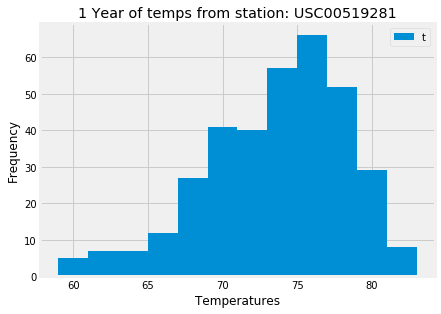

In [44]:
plt.hist(busy_df['tobs'], bins=12)
plt.tight_layout()
plt.xlabel('Temperatures')
plt.ylabel('Frequency')
plt.legend("tobs")
plt.title("1 Year of temps from station: " + busiest_station)
plt.show()
plt.savefig("Busy Station Temps.png")

In [45]:
 """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """

'TMIN, TAVG, and TMAX for a list of dates.\n   \n   Args:\n       start_date (string): A date string in the format %Y-%m-%d\n       end_date (string): A date string in the format %Y-%m-%d\n       \n   Returns:\n       TMIN, TAVE, and TMAX\n   '

In [46]:
def calc_temps(start_date, end_date):
   
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2016-8-24', '2017-8-23'))

[(58.0, 74.14387974230493, 87.0)]


In [47]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

print(calc_temps('2016-8-24', '2017-8-23'))

[(58.0, 74.14387974230493, 87.0)]


In [48]:
temps = calc_temps('2016-8-24', '2017-8-23')
temps

[(58.0, 74.14387974230493, 87.0)]

In [49]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)



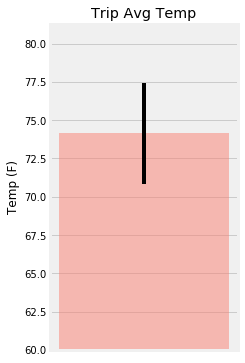

In [50]:

lower = temps[0][1] - temps[0][0]
upper = temps[0][2] - temps[0][1]

plt.figure(figsize=(3,6))
plt.bar(0, temps[0][1], yerr=[upper-lower], color='salmon', alpha=0.5)
plt.title('Trip Avg Temp')
plt.xticks([])
plt.ylabel('Temp (F)')
plt.ylim(60)
plt.savefig("Trip Avg Temp.png")
plt.show()

In [51]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevatio

In [52]:
total_rain = session.query(Measurement.station, Station.name, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation).\
join(Station, Measurement.station == Station.station).\
group_by(Measurement.station).filter(Measurement.date > year_ago).\
order_by(func.sum(Measurement.prcp).desc()).all()




In [53]:
total_rain

[('USC00516128',
  'MANOA LYON ARBO 785.2, HI US',
  147.11000000000004,
  21.3331,
  -157.8025,
  152.4),
 ('USC00519281',
  'WAIHEE 837.5, HI US',
  68.24000000000002,
  21.45167,
  -157.84888999999998,
  32.9),
 ('USC00513117',
  'KANEOHE 838.1, HI US',
  48.36000000000003,
  21.4234,
  -157.8015,
  14.6),
 ('USC00519523',
  'WAIMANALO EXPERIMENTAL FARM, HI US',
  37.99,
  21.33556,
  -157.71139,
  19.5),
 ('USC00514830',
  'KUALOA RANCH HEADQUARTERS 886.9, HI US',
  33.19,
  21.5213,
  -157.8374,
  7.0),
 ('USC00519397',
  'WAIKIKI 717.2, HI US',
  16.089999999999986,
  21.2716,
  -157.8168,
  3.0),
 ('USC00517948', 'PEARL CITY, HI US', 4.59, 21.3934, -157.9751, 11.9)]

In [54]:
total_rain_df = pd.DataFrame(total_rain, columns=["Stations", "Station Name" , "Total Rainfall", "Latitude", "Longitude", "Elevation"])

In [55]:
total_rain_df.head()

,Stations,Station Name,Total Rainfall,Latitude,Longitude,Elevation
0,USC00516128,"MANOA LYON ARBO 785.2, HI US",147.11,21.33310,-157.80250,152.4
1,USC00519281,"WAIHEE 837.5, HI US",68.24,21.45167,-157.84889,32.9
2,USC00513117,"KANEOHE 838.1, HI US",48.36,21.42340,-157.80150,14.6
3,USC00519523,"WAIMANALO EXPERIMENTAL FARM, HI US",37.99,21.33556,-157.71139,19.5
4,USC00514830,"KUALOA RANCH HEADQUARTERS 886.9, HI US",33.19,21.52130,-157.83740,7.0


## Optional Challenge Assignment

In [56]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date



In [57]:
def normals(date):
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
normals("08-24")

[(70.0, 75.96153846153847, 84.0)]

In [58]:


def daterange(date1, date2):
    for n in range(int ((date2 - date1).days)+1):
        yield date1 + timedelta(n)

start_dt = date(2016, 8, 24)
end_dt = date(2017, 8, 23)
for dt in daterange(start_dt, end_dt):
    print(dt.strftime("%Y-%m-%d"))


2016-08-24
2016-08-25
2016-08-26
2016-08-27
2016-08-28
2016-08-29
2016-08-30
2016-08-31
2016-09-01
2016-09-02
2016-09-03
2016-09-04
2016-09-05
2016-09-06
2016-09-07
2016-09-08
2016-09-09
2016-09-10
2016-09-11
2016-09-12
2016-09-13
2016-09-14
2016-09-15
2016-09-16
2016-09-17
2016-09-18
2016-09-19
2016-09-20
2016-09-21
2016-09-22
2016-09-23
2016-09-24
2016-09-25
2016-09-26
2016-09-27
2016-09-28
2016-09-29
2016-09-30
2016-10-01
2016-10-02
2016-10-03
2016-10-04
2016-10-05
2016-10-06
2016-10-07
2016-10-08
2016-10-09
2016-10-10
2016-10-11
2016-10-12
2016-10-13
2016-10-14
2016-10-15
2016-10-16
2016-10-17
2016-10-18
2016-10-19
2016-10-20
2016-10-21
2016-10-22
2016-10-23
2016-10-24
2016-10-25
2016-10-26
2016-10-27
2016-10-28
2016-10-29
2016-10-30
2016-10-31
2016-11-01
2016-11-02
2016-11-03
2016-11-04
2016-11-05
2016-11-06
2016-11-07
2016-11-08
2016-11-09
2016-11-10
2016-11-11
2016-11-12
2016-11-13
2016-11-14
2016-11-15
2016-11-16
2016-11-17
2016-11-18
2016-11-19
2016-11-20
2016-11-21
2016-11-22

In [59]:
#query to return list of temps for each date
def daily_normals(chosen_date):
    temps = session.query(Measurement.tobs).filter(Measurement.date.like('%'+chosen_date)).all()
    obs = [x for (x), in temps]
    return obs
    
start_date = '08-23'
end_date = '08-24'

#function to generate list of dates given any start and end date
def create_date_list(start_date, end_date):
    start_month = start_date.split("-")[0]
    end_month = end_date.split("-")[0]
    
    start_day = int(start_date.split("-")[1])
    end_day = int(end_date.split("-")[1])
    
    if start_month == end_month:
        diff = end_day - start_day
        days = [start_day + x for x in range(0,diff + 1) ]
    
    else:
        diff1 = 31 - start_day
        days1 = [start_day + x for x in range(0,diff1 + 1)]
        days2 = [x for x in range(1, end_day + 1)]
        days = days1 + days2
        
    days_str = [('%s-%s' % (start_month, str(x))) if len(str(x)) == 2 else ('%s-0%s' % (end_month, str(x))) for x in days]
    return days_str

#uses functions above to return dictionary of normals, skips dates for which there is no data (false dates)
def query_results(start, end):
    dates = create_date_list(start, end)
    master_dict = {"Date": [], "Max Temp": [], "Min Temp": [], "Average Temp": []}
    for date in dates:
        data_list = []
        observations = daily_normals(date)
        if observations != []:
            for temp in observations:
                data_list.append(temp)
            master_dict['Date'].append(date)
            master_dict['Max Temp'].append(max(data_list))
            master_dict['Min Temp'].append(min(data_list))
            master_dict['Average Temp'].append(round(np.mean(data_list),2))
            master_dict
    return(master_dict)

In [60]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

  
normals_df = pd.DataFrame(query_results('08-01', '08-14')).set_index('Date')
normals_df

,Average Temp,Max Temp,Min Temp
Date,,,
08-01,75.54,83.0,67.0
08-02,75.60,84.0,68.0
08-03,76.61,85.0,70.0
08-04,76.71,84.0,69.0
08-05,76.15,82.0,69.0
08-06,76.25,83.0,67.0
08-07,77.16,83.0,71.0
08-08,76.56,83.0,68.0
08-09,75.98,81.0,69.0


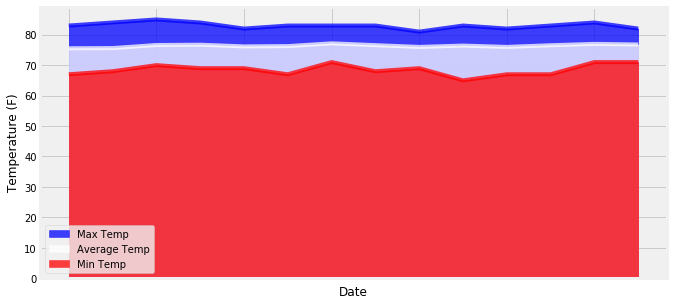

In [61]:
# Plot the daily normals as an area plot with `stacked=False`

normals_df = normals_df[['Max Temp', 'Average Temp', 'Min Temp']]

normals_df.plot(kind = 'area', stacked = False, alpha = .75, rot = 45, color = ['blue', 'white', 'red'], figsize = (10,5), linestyle = 'solid')
plt.xlabel('Date')
plt.ylabel('Temperature (F)')
plt.legend(frameon = True)

plt.show()


In [62]:
fig.savefig('daily_normals.png')

# Climate App